<a href="https://colab.research.google.com/github/RithikaSelvakumar/brain_tumour_pred/blob/main/Brain_tumour_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip /content/brain_tumour.zip

Archive:  /content/brain_tumour.zip
  inflating: Training/notumor/Tr-noTr_0000.jpg  
  inflating: Training/notumor/Tr-noTr_0001.jpg  
  inflating: Training/notumor/Tr-noTr_0002.jpg  
  inflating: Training/notumor/Tr-noTr_0003.jpg  
  inflating: Training/notumor/Tr-noTr_0004.jpg  
  inflating: Training/notumor/Tr-noTr_0005.jpg  
  inflating: Training/notumor/Tr-noTr_0006.jpg  
  inflating: Training/notumor/Tr-noTr_0007.jpg  
  inflating: Training/notumor/Tr-noTr_0008.jpg  
  inflating: Training/notumor/Tr-noTr_0009.jpg  
  inflating: Training/notumor/Tr-no_0010.jpg  
  inflating: Training/notumor/Tr-no_0011.jpg  
  inflating: Training/notumor/Tr-no_0012.jpg  
  inflating: Training/notumor/Tr-no_0013.jpg  
  inflating: Training/notumor/Tr-no_0014.jpg  
  inflating: Training/notumor/Tr-no_0015.jpg  
  inflating: Training/notumor/Tr-no_0016.jpg  
  inflating: Training/notumor/Tr-no_0017.jpg  
  inflating: Training/notumor/Tr-no_0018.jpg  
  inflating: Training/notumor/Tr-no_0019.jpg  
  in

In [2]:
import os
import numpy as np
import shutil
import glob
import math
import matplotlib.pyplot as plt


In [3]:
root_dir="/content/Training"
number_of_images={}
for dir in os.listdir(root_dir):
  number_of_images[dir]=len(os.listdir(os.path.join(root_dir, dir)))

In [4]:
number_of_images.items()

dict_items([('pituitary', 1457), ('notumor', 1595)])

In [5]:
def datafolder(p,split):
  if not os.path.exists("./"+p):
    os.mkdir("./"+p)
    for dir in os.listdir(root_dir):
      os.makedirs("./"+p+"/"+dir)
      for img in np.random.choice(a=os.listdir(os.path.join(root_dir, dir)),
                                  size=math.floor(split*number_of_images[dir]-5),
                                  replace=False):
        O=os.path.join(root_dir, dir, img)
        D=os.path.join("./"+p, dir)
        shutil.copy(O, D)
        os.remove(O)
  else:
    print(f"{p}folder exist")

In [6]:
datafolder("train",0.7)

In [7]:
datafolder("val",0.15)

In [8]:
datafolder("test",0.15)

In [9]:
number_of_images={}
for dir in os.listdir(root_dir):
  number_of_images[dir]=len(os.listdir(os.path.join(root_dir, dir)))
number_of_images.items()

dict_items([('pituitary', 17), ('notumor', 16)])

In [10]:
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D
from keras.models import Sequential
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [11]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,537,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,635,361 (21.50 MB)

 Trainable params: 5,635,361 (21.50 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
def preprocess_image(img_path):
    image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, rescale=1/255,horizontal_flip=True)
    image = image_data.flow_from_directory(img_path, target_size=(224,224), batch_size=32, class_mode='binary')
    return image

In [14]:
path= "/content/train"
train_data = preprocess_image(path)

Found 2125 images belonging to 2 classes.


In [15]:
def preprocess_image2(img_path):
    image_data = ImageDataGenerator(rescale=1/255)
    image = image_data.flow_from_directory(img_path, target_size=(224,224), batch_size=32, class_mode='binary')
    return image

In [16]:
path= "/content/test"
test_data = preprocess_image2(path)

Found 447 images belonging to 2 classes.


In [17]:
path= "/content/val"
val_data = preprocess_image2(path)

Found 447 images belonging to 2 classes.


In [18]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es=EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=3, verbose=1, mode='auto')
mc=ModelCheckpoint(monitor="val_accuracy",filepath="best_model.h5",  verbose=1, save_best_only=True, mode = 'auto')

cd=[es,mc]

In [21]:
hs = model.fit(train_data,
                         steps_per_epoch =8,
                         epochs=30,verbose=1,
                         validation_data=val_data,
                         validation_steps=16,
                         callbacks=cd)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.5342 - loss: 0.7740
Epoch 1: val_accuracy improved from -inf to 0.52349, saving model to best_model.h5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 987ms/step - accuracy: 0.5365 - loss: 0.7688 - val_accuracy: 0.5235 - val_loss: 0.6125
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.5559 - loss: 0.6252
Epoch 2: val_accuracy improved from 0.52349 to 0.80089, saving model to best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 752ms/step - accuracy: 0.5675 - loss: 0.6217 - val_accuracy: 0.8009 - val_loss: 0.4263
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 806ms/step - accuracy: 0.8179 - loss: 0.4607
Epoch 3: val_accuracy improved from 0.80089 to 0.85235, saving model to best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8185 - loss: 0.4599 - val_accuracy: 0.8523 - val_loss: 0.3128
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.8500 - loss: 0.3434
Epoch 4: val_accuracy improved from 0.85235 to 0.92841, saving model to best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 560ms/step - accuracy: 0.8519 - loss: 0.3420 - val_accuracy: 0.9284 - val_loss: 0.2150
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.8584 - loss: 0.2894
Epoch 5: val_accuracy improved from 0.92841 to 0.94855, saving model to best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 541ms/step - accuracy: 0.8603 - loss: 0.2891 - val_accuracy: 0.9485 - val_loss: 0.1419
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.9221 - loss: 0.1912
Epoch 6: val_accuracy improved from 0.94855 to 0.96644, saving model to best_model.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 506ms/step - accuracy: 0.9230 - loss: 0.1888 - val_accuracy: 0.9664 - val_loss: 0.1033
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.9590 - loss: 0.1423
Epoch 7: val_accuracy did not improve from 0.96644
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 649ms/step - accuracy: 0.9588 - loss: 0.1396 - val_accuracy: 0.9083 - val_loss: 0.2465
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - accuracy: 0.8823 - loss: 0.3417
Epoch 8: val_accuracy did not improve from 0.96644
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 423ms/step - accuracy: 0.8841 - loss: 0.3326 - val_accuracy: 0.9329 - val_loss: 0.1911
Epoch 9/30
3/8 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9497 - loss: 0.1452
Epoch 9: val_accuracy did not improve from 0.96644
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.9355 - loss: 0.1533 - val_accuracy: 0.9396 - val_loss: 0.1549
Epoch 9: early stopping


In [22]:
h=hs.history
h.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

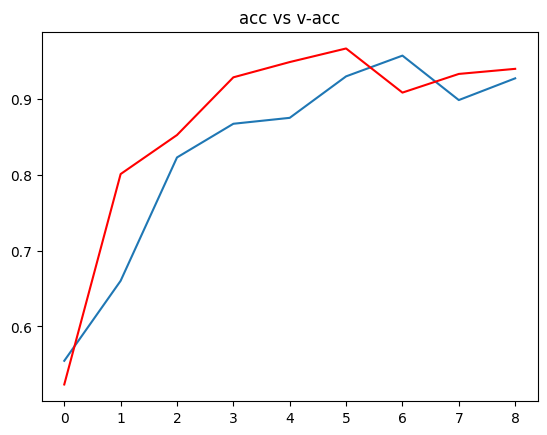

In [24]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")
plt.title("acc vs v-acc")
plt.show()

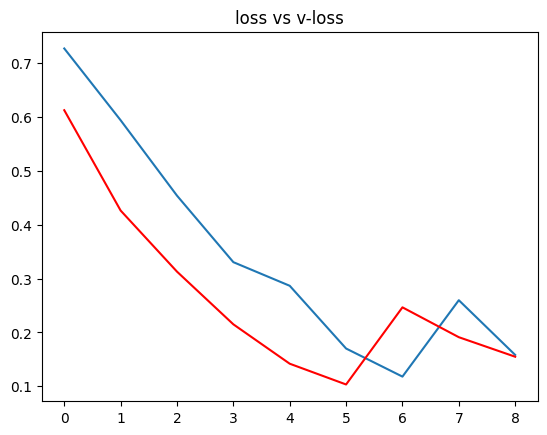

In [26]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")
plt.title("loss vs v-loss")
plt.show()

In [27]:
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [29]:
acc=model.evaluate(test_data)[1]
print(f"The accuracy of the model is {acc*100}%")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.9557 - loss: 0.1388
The accuracy of the model is 96.19686603546143%


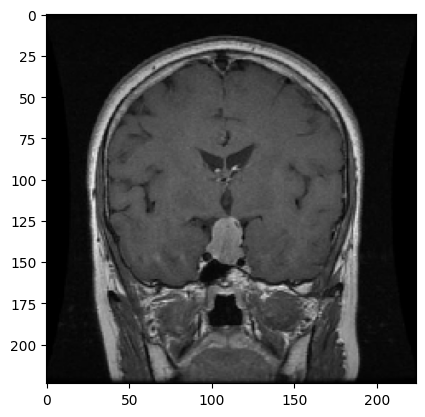

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
tumor


array([[0.95001256]], dtype=float32)

In [37]:
path="/content/test/pituitary/Tr-piTr_0002.jpg"
image=load_img(path, target_size=(224,224))
imput_arr=img_to_array(image)/255
imput_arr=np.array([imput_arr])

plt.imshow(image)
plt.show()

result=model.predict(imput_arr)
if result<0.5:
  print("notumor")
else:
  print("tumor")

result

In [39]:
from sklearn.metrics import classification_report
import numpy as np

# Assuming 'val_data' from previous cells is your validation data generator
validation_generator = val_data

# Predict on validation/test dataset
y_pred = model.predict(validation_generator)  # Predictions (probabilities)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert to class labels (0 or 1)

# Get true labels
y_true = validation_generator.classes  # True class labels

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=validation_generator.class_indices.keys()))

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step
              precision    recall  f1-score   support

     notumor       0.50      0.47      0.49       234
   pituitary       0.45      0.47      0.46       213

    accuracy                           0.47       447
   macro avg       0.47      0.47      0.47       447
weighted avg       0.48      0.47      0.47       447

